<div style="text-align: left;">
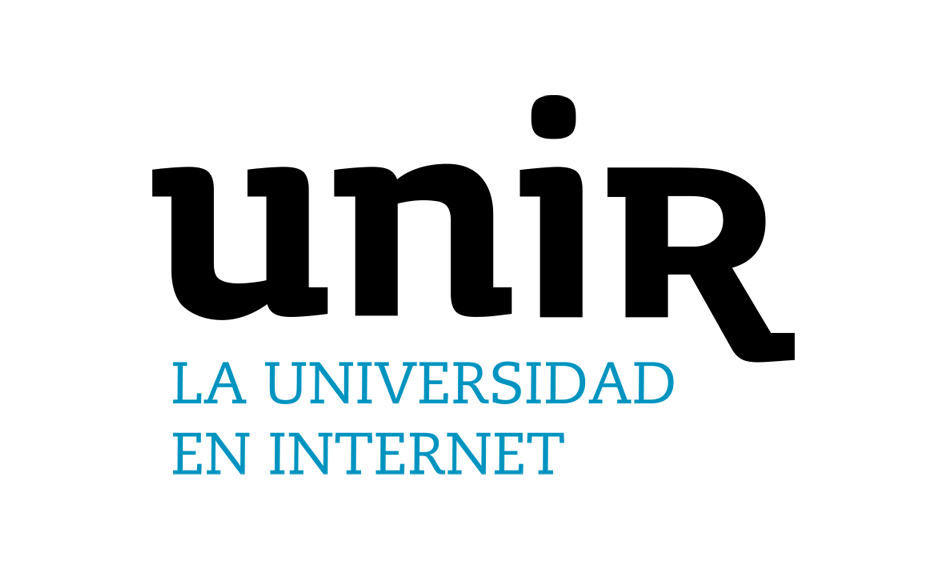
     <div>
        <h1>Simulación Log-Normal</h1>
        <p>Dr. Miguel Angel Navarro Burgos</p>
        <p>Máster Universitario en Ingeniería Matemática y Computación</p>
        <p>Modelización y Valoración de Derivados y Carteras en Finanzas</p>
    </div>
</div>

Recordemos que la solución de la ecuación diferencial estocástica que describe la evolución del precio de un activo en el modelo log-normal es:

$$
S(t) = S_0 e^{(\mu - \frac{1}{2} \sigma^2) t + \sigma W(t)}
$$

donde:

- $S(t)$ es el precio del activo en el tiempo $t$.
- $S_0$ es el precio inicial del activo.
- $\mu$ es la tasa de crecimiento esperada.
- $\sigma$ es la volatilidad.
- $W(t)$ es un proceso de Wiener (movimiento Browniano).


# SImulación proceso de Wiener

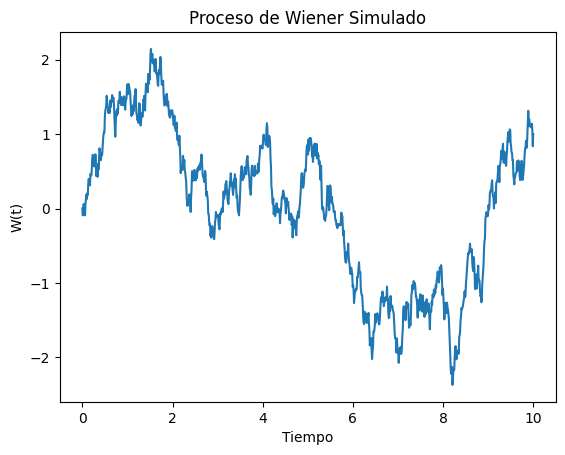

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# Inicializar los valores
num_steps = 1000       # Número de pasos en cada simulación
delta_t = 0.01         # Tamaño del paso de tiempo

t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
w_values = [0.0]  # Inicialización del proceso de Wiener

# Simular los pasos de tiempo
for _ in range(num_steps - 1):
    # Generar un incremento aleatorio de Wiener
    w_increment = np.sqrt(delta_t) * np.random.normal(0, 1)
    # Calcular el siguiente valor del proceso de Wiener
    w_values.append(w_values[-1] + w_increment)

# Graficar los resultados
plt.plot(t, w_values)
plt.title('Proceso de Wiener Simulado')
plt.xlabel('Tiempo')
plt.ylabel('W(t)')
plt.show()


# Modelo Log-Normal con $\mu$ y $\sigma$ datos dados

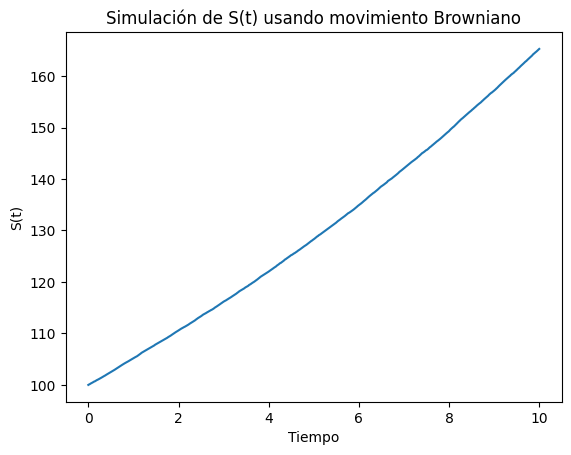

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Inicializar los valores
num_steps = 1000       # Número de pasos en cada simulación
delta_t = 0.01         # Tamaño del paso de tiempo

t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
w_values = [0.0]  # Inicialización del proceso de Wiener

# Parámetros de S(t)
S0 = 100           # Valor inicial de S
mu = 0.05          # Tasa de retorno
sigma = 0.001      # Volatilidad

# Simular el proceso de Wiener
for _ in range(num_steps - 1):
    # Generar un incremento aleatorio de Wiener
    w_increment = np.sqrt(delta_t) * np.random.normal(0, 1)
    # Calcular el siguiente valor del proceso de Wiener
    w_values.append(w_values[-1] + w_increment)

# Calcular S(t) usando la fórmula
S_values = [S0 * np.exp((mu - 0.5 * sigma**2) * t[i] + sigma * w_values[i]) for i in range(num_steps)]

# Graficar S(t)
plt.plot(t, S_values)
plt.title('Simulación de S(t) usando movimiento Browniano')
plt.xlabel('Tiempo')
plt.ylabel('S(t)')
plt.show()


# Modelo Log-Normal con $\mu$ y $\sigma$ estimados desde un conjunto de datos

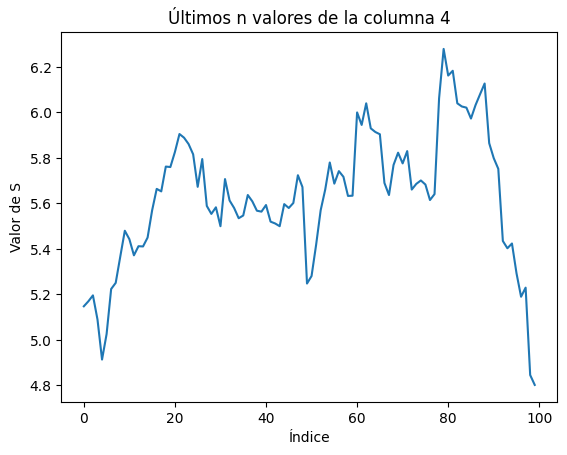

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
n = 100
S = pd.read_csv("datos.csv").iloc[:, 4][-n:].to_numpy() # últimos n datos

# Graficar los datos
plt.plot(S)
plt.title('Últimos n valores de la columna 4')
plt.xlabel('Índice')
plt.ylabel('Valor de S')
plt.show()


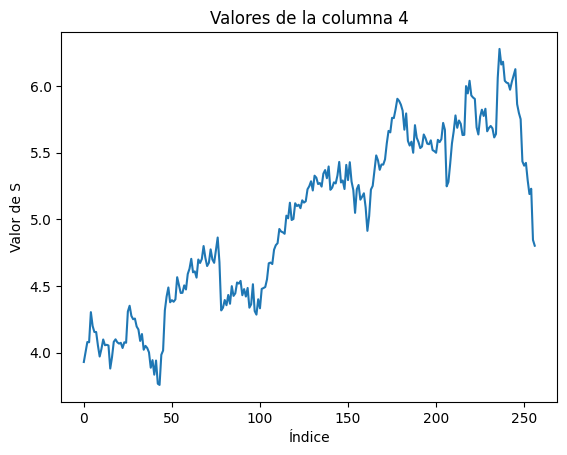

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy() # todos los datos

# Graficar los datos
plt.plot(S)
plt.title('Valores de la columna 4')
plt.xlabel('Índice')
plt.ylabel('Valor de S')
plt.show()


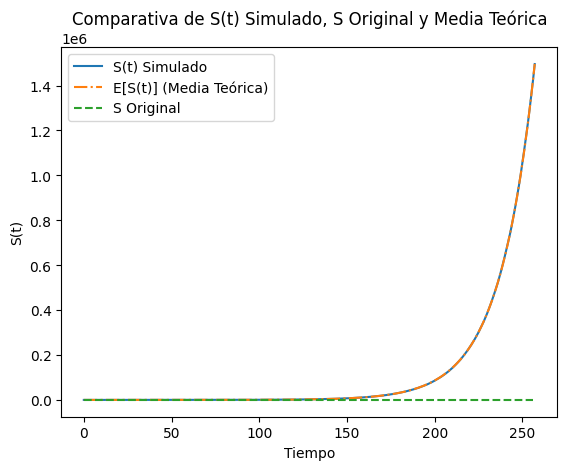

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

# Inicializar los valores
num_steps = len(S)       # Número de pasos en cada simulación (tamaño de S)
delta_t = 1              # Tamaño del paso de tiempo (puedes ajustarlo si es necesario)

# Calcular los retornos logarítmicos
U = np.log(S[1:] / S[:-1])

# Calcular sigma y mu a partir de los retornos logarítmicos
sigmaMME = np.std(U, ddof=1) / np.sqrt(delta_t)
muMMe = (np.mean(U) +  **2 / 2) / delta_t

# Simular el proceso de Wiener
t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
w_values = [0.0]  # Inicialización del proceso de Wiener

for _ in range(num_steps - 1):
    # Generar un incremento aleatorio de Wiener
    w_increment = np.sqrt(delta_t) * np.random.normal(0, 1)
    # Calcular el siguiente valor del proceso de Wiener
    w_values.append(w_values[-1] + w_increment)

# Calcular S(t) usando la fórmula con los valores calculados de mu y sigma
S0 = S[0]  # Valor inicial de S tomado de los datos originales
S_values = [S0 * np.exp((mu - 0.5 * sigma**2) * t[i] + sigma * w_values[i]) for i in range(num_steps)]

# Calcular la media teórica E(S(t)) = S0 * exp(mu * t)
mu_S_values = [S0 * np.exp(mu * t[i]) for i in range(num_steps)]

# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S_values, label='S(t) Simulado')
plt.plot(t, mu_S_values, label='E[S(t)] (Media Teórica)', linestyle='-.')
plt.plot(S, label='S Original', linestyle='--')
plt.title('Comparativa de S(t) Simulado, S Original y Media Teórica')
plt.xlabel('Tiempo')
plt.ylabel('S(t)')
plt.legend()
plt.show()


# Método de Momentos Estadístico

<IPython.core.display.Math object>

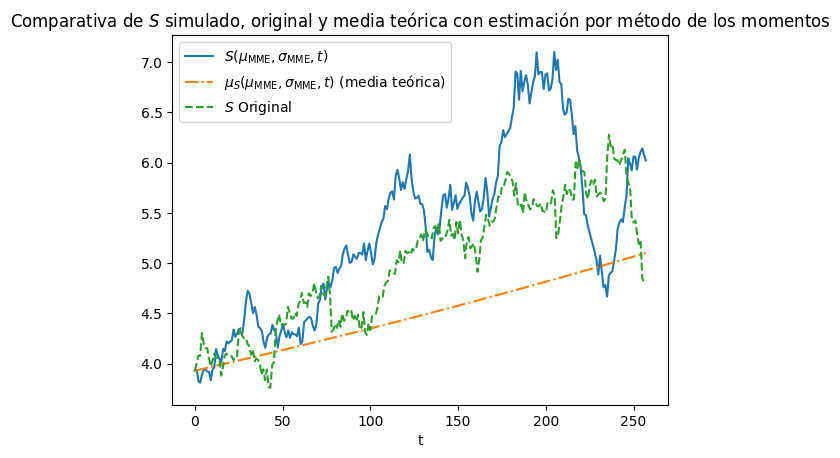

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math

# Habilitar renderizado de texto en LaTeX en matplotlib
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

# Inicializar los valores
num_steps = len(S)       # Número de pasos en cada simulación (tamaño de S)
delta_t = 1              # Tamaño del paso de tiempo

# Calcular los retornos logarítmicos
U = np.log(S[1:] / S[:-1])

# Calcular sigma y mu a partir de los retornos logarítmicos
sigmaMME = np.std(U, ddof=1) / np.sqrt(delta_t)
muMME = (np.mean(U) + sigmaMME**2 / 2) / delta_t

# Mostrar estimaciones
texto = f"\\text{{Los estimadores son: }}\\mu_{{\\text{{MME}}}} = {muMME:0.5f} \\text{{ y }} \\sigma_{{\\text{{MME}}}} = {sigmaMME:0.5f}"
display(Math(texto))

# Simular el proceso de Wiener usando operaciones vectorizadas
t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
w_increments = np.sqrt(delta_t) * np.random.normal(0, 1, num_steps - 1)  # Incrementos del proceso de Wiener
w_values = np.insert(np.cumsum(w_increments), 0, 0)  # Proceso de Wiener acumulado, con 0 inicial

# Calcular S(t) usando la fórmula con los valores calculados de mu y sigma
S0 = S[0]  # Valor inicial de S tomado de los datos originales
S_values_MME = S0 * np.exp((muMME - 0.5 * sigmaMME**2) * t + sigmaMME * w_values)

# Calcular la media teórica E(S(t)) = S0 * exp(muMME * t)
mu_S_values_MME = S0 * np.exp(muMME * t)

# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S_values_MME, label=r'$S\left(\mu_{\text{MME}},\sigma_{\text{MME}},t\right)$')
plt.plot(t, mu_S_values_MME, label=r'$\mu_S\left(\mu_{\text{MME}},\sigma_{\text{MME}},t\right)$ (media teórica)', linestyle='-.')
plt.plot(S, label=r'$S$ Original', linestyle='--')

# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método de los momentos')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()


# Método de Máxima Verosimilitud

<IPython.core.display.Math object>

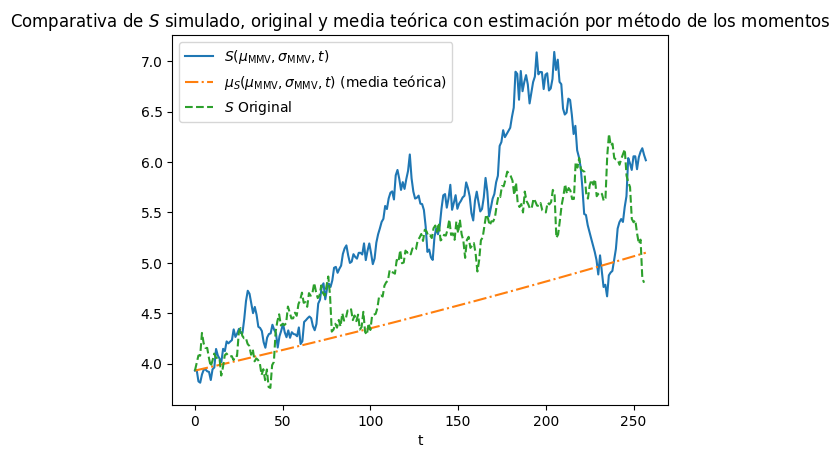

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math


# Habilitar renderizado de texto en LaTeX en matplotlib
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

# Inicializar los valores
num_steps = len(S)       # Número de pasos en cada simulación (tamaño de S)
delta_t = 1              # Tamaño del paso de tiempo

# Calcular los retornos logarítmicos
R = S[1:] / S[:-1] - 1

# Calcular sigma y mu a partir de los retornos logarítmicos
sigmaMMV = np.std(R, ddof=0) / np.sqrt(delta_t)
muMMV = np.mean(R) / delta_t

# Mostrar estimaciones
texto = f"\\text{{Los estimadores son: }}\\mu_{{\\text{{MMV}}}} = {muMMV:0.5f} \\text{{ y }} \\sigma_{{\\text{{MMV}}}} = {sigmaMMV:0.5f}"
display(Math(texto))

# Simular el proceso de Wiener usando operaciones vectorizadas
t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
#w_increments = np.sqrt(delta_t) * np.random.normal(0, 1, num_steps - 1)  # Incrementos del proceso de Wiener
#w_values = np.insert(np.cumsum(w_increments), 0, 0)  # Proceso de Wiener acumulado, con 0 inicial

# Calcular S(t) usando la fórmula con los valores calculados de mu y sigma
S0 = S[0]  # Valor inicial de S tomado de los datos originales
S_values_MMV = S0 * np.exp((muMMV - 0.5 * sigmaMMV**2) * t + sigmaMMV * w_values)

# Calcular la media teórica E(S(t)) = S0 * exp(mu * t)
mu_S_values_MMV = S0 * np.exp(muMMV * t)

# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S_values_MMV, label=r'$S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$')
plt.plot(t, mu_S_values_MMV, label=r'$\mu_S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$ (media teórica)', linestyle='-.')
plt.plot(S, label=r'$S$ Original', linestyle='--')

# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método de los momentos')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()


# Comparativa entre Método de los momentos y máxima verosimilitud

# Con Wiener

<IPython.core.display.Math object>

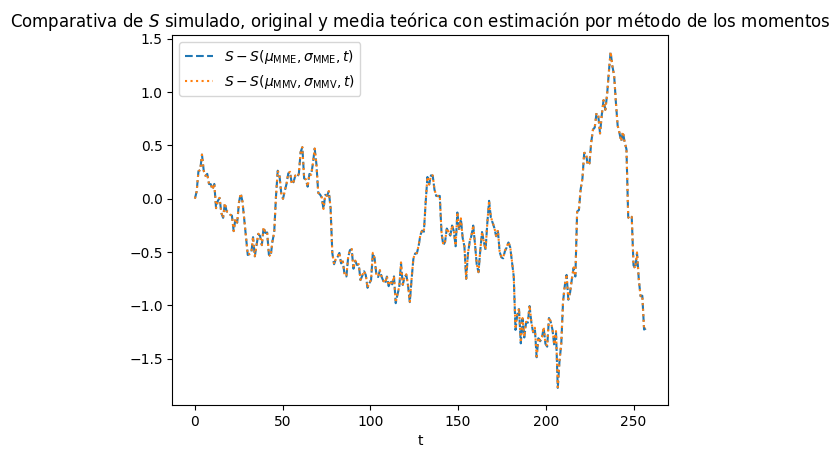

In [4]:
# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S-S_values_MME, label=r'$S-S\left(\mu_{\text{MME}},\sigma_{\text{MME}},t\right)$', linestyle='--')
plt.plot(t, S-S_values_MMV, label=r'$S-S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$', linestyle=':')

# Mostrar errores estimaciones
texto =  f"\\text{{Los errores de las estimaciones son: }} \\; |S - S(\\mu_{{\\text{{MME}}}}, \\sigma_{{\\text{{MME}}}}, t)| = {np.linalg.norm(S-S_values_MME):0.5f} \\text{{ y }} |S - S(\\mu_{{\\text{{MMV}}}}, \\sigma_{{\\text{{MMV}}}}, t)| = {np.linalg.norm(S-S_values_MMV):0.5f}"
display(Math(texto))


# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método de los momentos')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()

# Medias teóricas

<IPython.core.display.Math object>

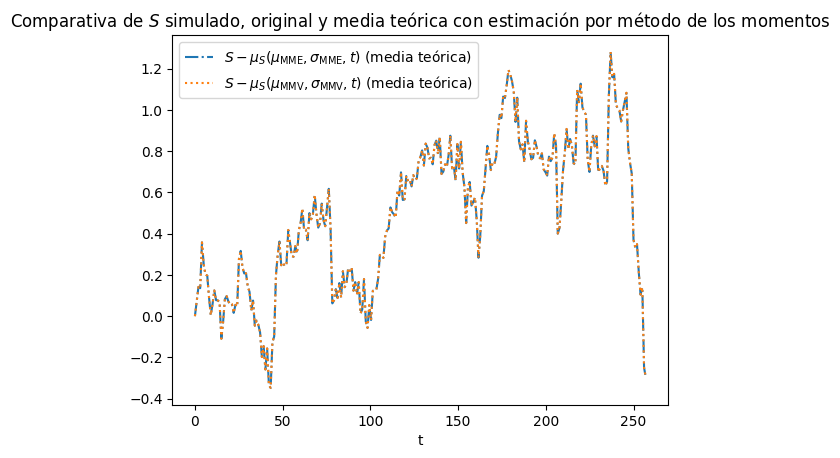

In [5]:
# Graficar S(t) simulado, los datos originales y la media teórica
#plt.plot(t, S_values_MME-S_values_MMV, label=r'$S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$')
plt.plot(t, S-mu_S_values_MME, label=r'$S-\mu_S\left(\mu_{\text{MME}},\sigma_{\text{MME}},t\right)$ (media teórica)', linestyle='-.')
plt.plot(t, S-mu_S_values_MMV, label=r'$S-\mu_S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$ (media teórica)', linestyle=':')

# Mostrar errores estimaciones
texto =  f"\\text{{Los errores de las estimaciones son: }} \\; |S - \\mu_S(\\mu_{{\\text{{MME}}}}, \\sigma_{{\\text{{MME}}}}, t)| = {np.linalg.norm(S-mu_S_values_MME):0.5f} \\text{{ y }} |S - \\mu_S(\\mu_{{\\text{{MMV}}}}, \\sigma_{{\\text{{MMV}}}}, t)| = {np.linalg.norm(S-mu_S_values_MMV):0.5f}"
display(Math(texto))

# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método de los momentos')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()